# Inspect `gausspy` results for TIGRESS-NCR Sightlines
Trey V. Wenger - October 2024

Visualize `gausspy` results and compres to TIGRESS-NCR physics.

In [1]:
import pickle

resultsdir = "/media/drive1/tigress_ncr_results/R8_4pc"

synth_data_resampled = {"matched": {}, "mismatched": {}}

fwhms = [1, 3, 10]
for key in synth_data_resampled.keys():
    for fwhm in fwhms:
        print(key, fwhm)
        with open(f"{resultsdir}/HI_{key}_spectra_{fwhm}pix_resampled.pkl", "rb") as f:
            synth_data_resampled[key][fwhm] = pickle.load(f)

matched 1
matched 3
matched 10
mismatched 1
mismatched 3
mismatched 10


## Load TIGRESS-NCR sightlines

In [2]:
with open(f"{resultsdir}/tigress_tigress_results.pkl", "rb") as f:
    tigress_results = pickle.load(f)

## Load `gausspy` results

In [ ]:
import pickle

from scripts import analysis_utils
import importlib
importlib.reload(analysis_utils)

from tqdm.notebook import tqdm

gausspy_results = {"matched": {}, "mismatched": {}}
fwhms = [1, 3, 10]
for key in synth_data_resampled.keys():
    for fwhm in fwhms:
        fname = f"{resultsdir}/HI_{key}_spectra_{fwhm}pix_resampled_agd.pkl"
        pbar = tqdm(total=len(synth_data_resampled[key][fwhm]['data_list']))
        gausspy_results[key][fwhm] = analysis_utils.compile_gausspy_results(
            fname, synth_data_resampled[key][fwhm], pbar, num_samples=100, seed=1234,
        )
        
with open(f"{resultsdir}/gausspy_tigress_results.pkl", "wb") as f:
    pickle.dump(gausspy_results, f)

In [4]:
with open(f"{resultsdir}/gausspy_tigress_results.pkl", "rb") as f:
    gausspy_results = pickle.load(f)

## Number of Cloud Components

analysis_plots version 0.1
analysis_plots version 0.1


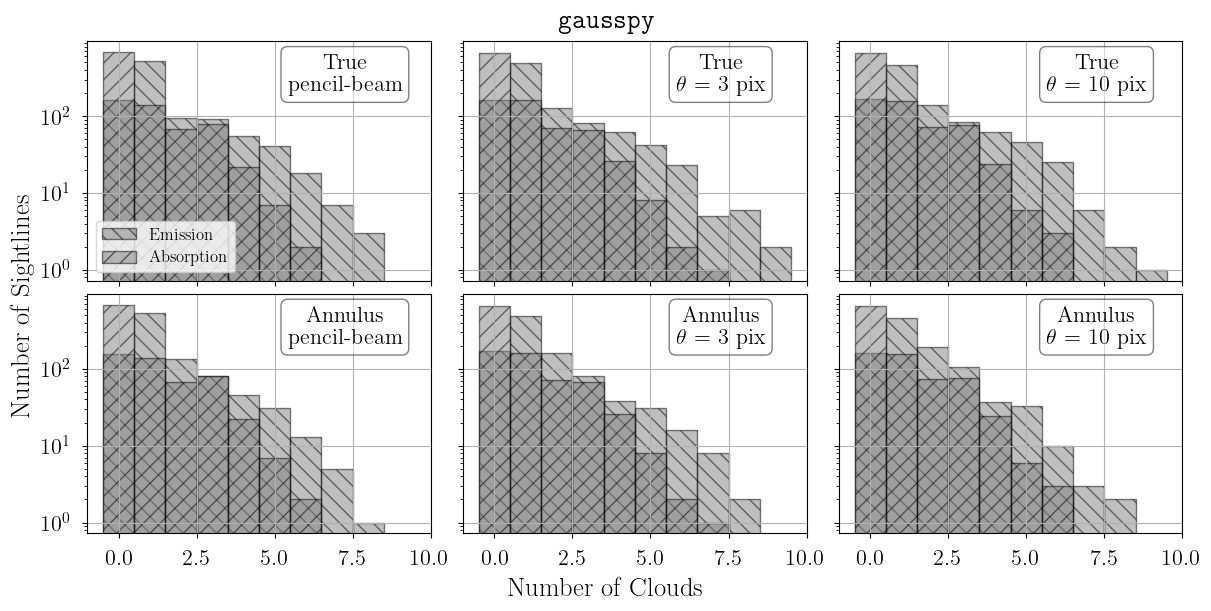

In [5]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)
import numpy as np

bins = np.arange(-0.5, 10.5, 1.0)
fig = analysis_plots.plot_grid(
    analysis_plots.Histogram,
    "num_clouds",
    [gausspy_results],
    ["gausspy"],
    xlabel="Number of Clouds",
    ylabel="Number of Sightlines",
    title=r"\texttt{gausspy}",
    bins=bins,
    equal_line=False,
    yscale="log",
    legend_loc="lower left",
)

## Filter Results

Some `gausspy` results have large errors. Let's drop them from the analysis.

In [64]:
bad_gausspy_sightlines = {"matched": {}, "mismatched": {}}

for key in ["matched", "mismatched"]:
    for fwhm in [1, 3, 10]:
        print(key, fwhm)
        bad_gausspy_sightlines[key][fwhm] = [
            idx for idx, result in gausspy_results[key][fwhm].items()
            if result["mean"]["n_gauss_em"] == 0 or
            (
                (np.array(result["sd"]["All_log10_NHI"]) > 1.0)
            )
        ]
        print(f"Dropping {len(bad_gausspy_sightlines[key][fwhm])} bad sightlines")
        print(f"{len(tigress_results[1]) - len(bad_gausspy_sightlines[key][fwhm])} sightlines remain")

matched 1
Dropping 182 bad sightlines
818 sightlines remain
matched 3
Dropping 203 bad sightlines
797 sightlines remain
matched 10
Dropping 193 bad sightlines
807 sightlines remain
mismatched 1
Dropping 187 bad sightlines
813 sightlines remain
mismatched 3
Dropping 190 bad sightlines
810 sightlines remain
mismatched 10
Dropping 193 bad sightlines
807 sightlines remain


## Sightline Results

analysis_plots version 0.1


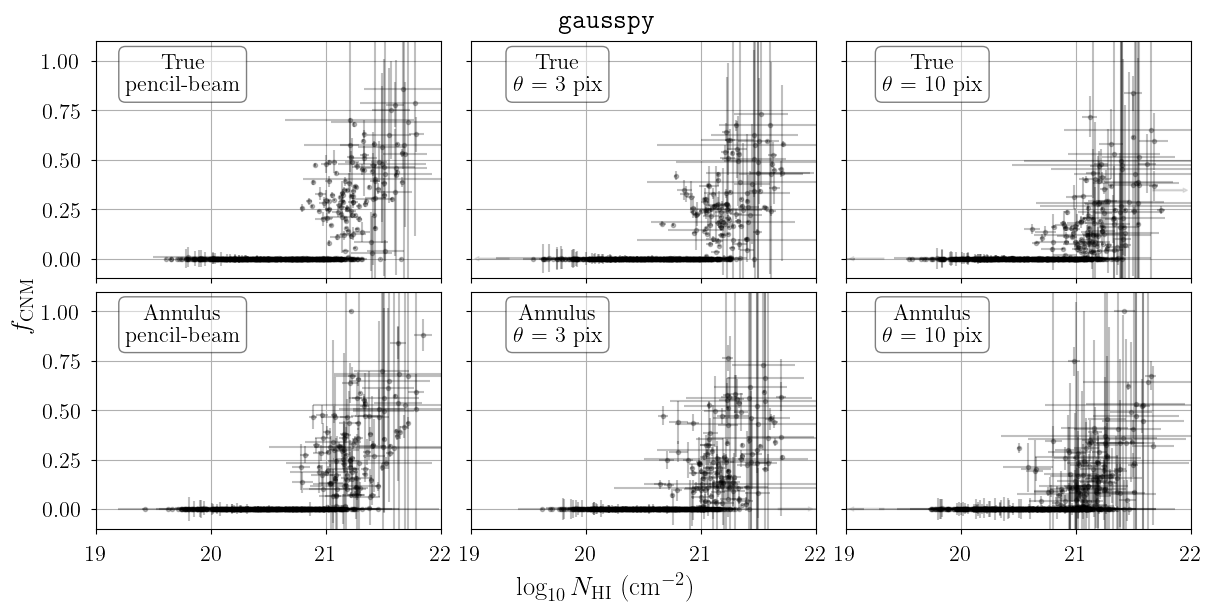

In [65]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [gausspy_results, gausspy_results],
    ["gausspy", "gausspy"],
    params = ["All_log10_NHI", "CNM_fraction"],
    num_bins=0,
    title=r"\texttt{gausspy}",
    xlabel=r"$\log_{10} N_{\rm HI}$ (cm$^{-2}$)",
    ylabel=r"$f_{\rm CNM}$",
    xlim=(19.0, 22.0),
    ylim=(-0.1, 1.1),
    equal_line=False,
    label_loc="upper left",
    drop_sightlines=bad_gausspy_sightlines,
)

analysis_plots version 0.1


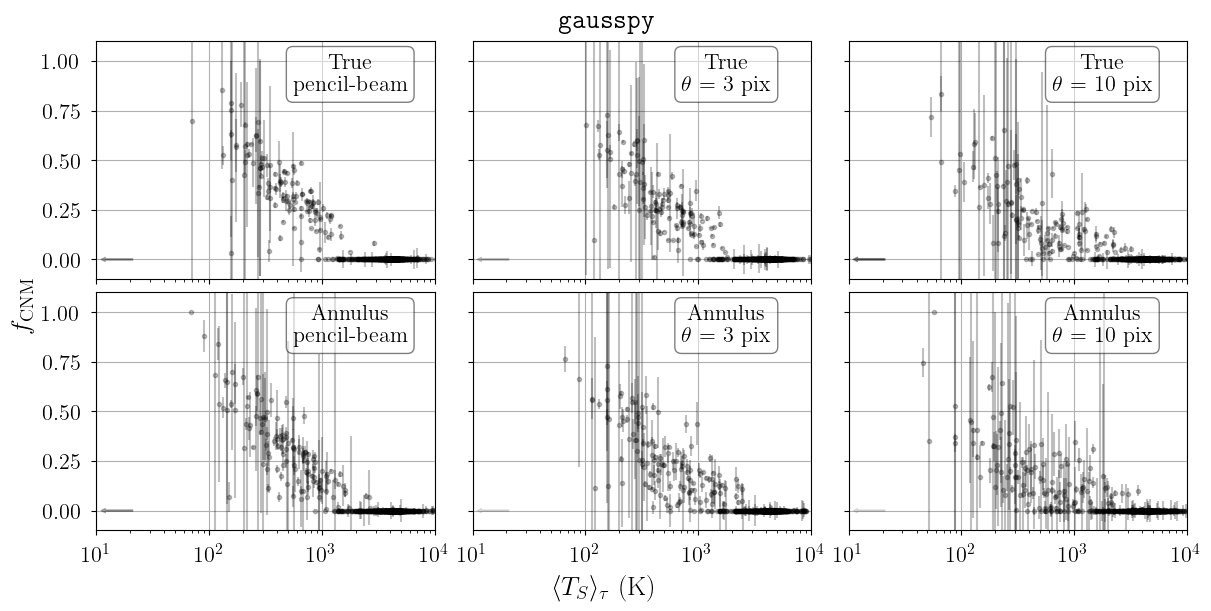

In [66]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [gausspy_results, gausspy_results],
    ["gausspy", "gausspy"],
    params = ["tau_weighted_tspin", "CNM_fraction"],
    num_bins=0,
    title=r"\texttt{gausspy}",
    xlabel=r"$\langle T_{S}\rangle_\tau$ (K)",
    ylabel=r"$f_{\rm CNM}$",
    xlim=(10.0, 10000.0),
    ylim=(-0.1, 1.1),
    xscale="log",
    equal_line=False,
    label_loc="upper right",
    drop_sightlines=bad_gausspy_sightlines,
)

analysis_plots version 0.1


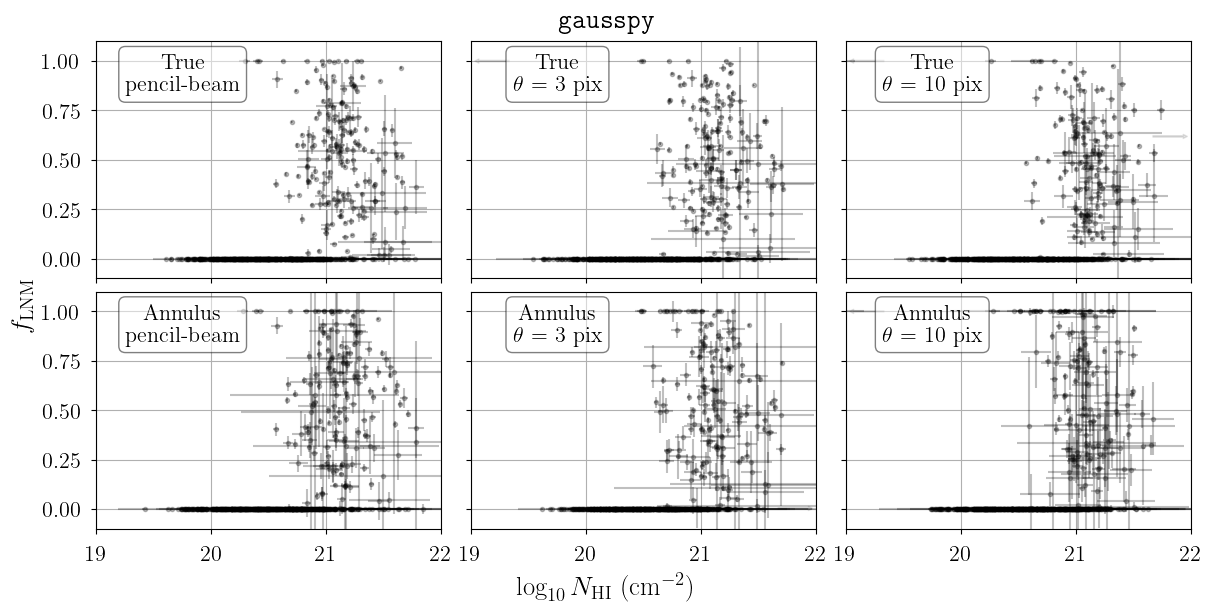

In [67]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [gausspy_results, gausspy_results],
    ["gausspy", "gausspy"],
    params = ["All_log10_NHI", "LNM_fraction"],
    num_bins=0,
    title=r"\texttt{gausspy}",
    xlabel=r"$\log_{10} N_{\rm HI}$ (cm$^{-2}$)",
    ylabel=r"$f_{\rm LNM}$",
    xlim=(19.0, 22.0),
    ylim=(-0.1, 1.1),
    equal_line=False,
    label_loc="upper left",
    drop_sightlines=bad_gausspy_sightlines,
)

analysis_plots version 0.1


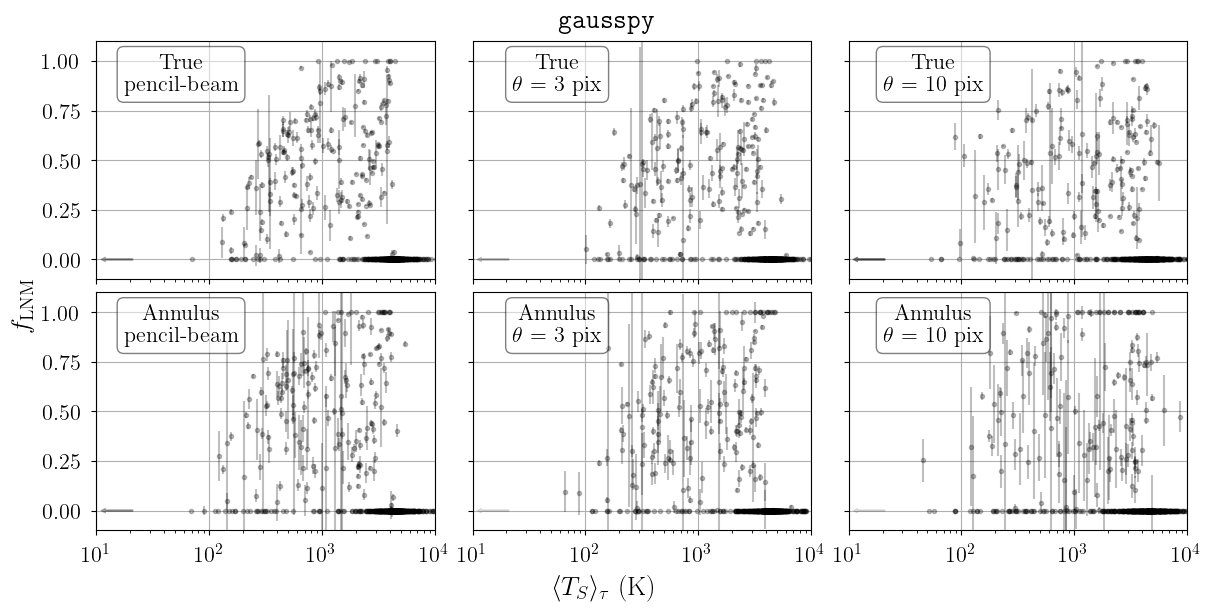

In [68]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [gausspy_results, gausspy_results],
    ["gausspy", "gausspy"],
    params = ["tau_weighted_tspin", "LNM_fraction"],
    num_bins=0,
    title=r"\texttt{gausspy}",
    xlabel=r"$\langle T_{S}\rangle_\tau$ (K)",
    ylabel=r"$f_{\rm LNM}$",
    xlim=(10.0, 10000.0),
    ylim=(-0.1, 1.1),
    xscale="log",
    equal_line=False,
    label_loc="upper left",
    drop_sightlines=bad_gausspy_sightlines,
)

analysis_plots version 0.1


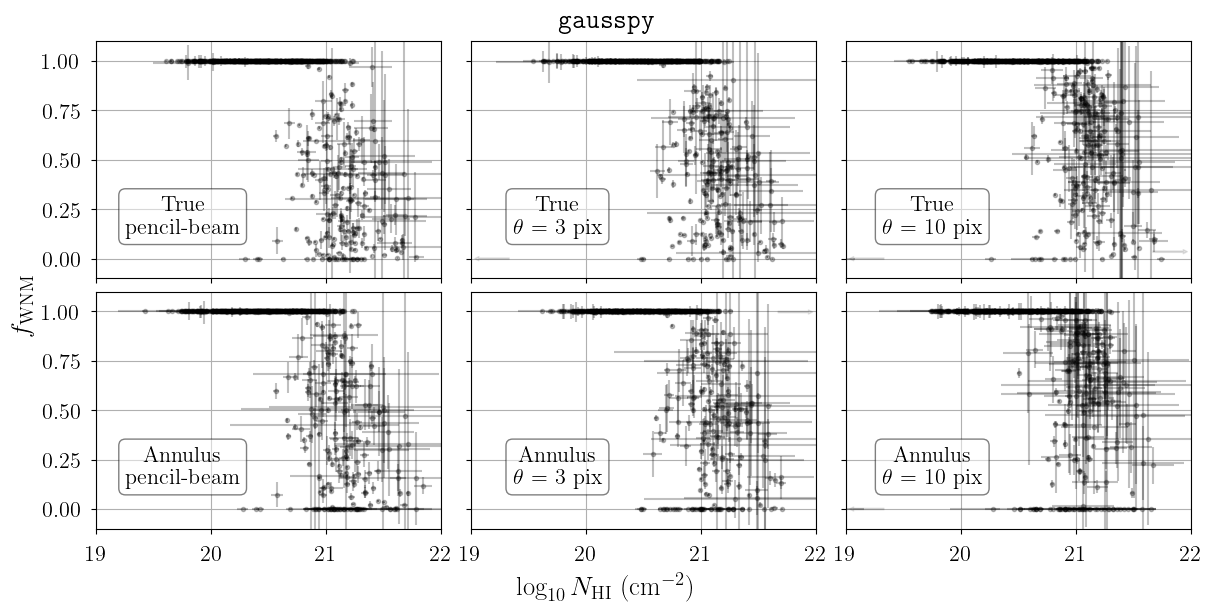

In [69]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [gausspy_results, gausspy_results],
    ["gausspy", "gausspy"],
    params = ["All_log10_NHI", "WNM_fraction"],
    num_bins=0,
    title=r"\texttt{gausspy}",
    xlabel=r"$\log_{10} N_{\rm HI}$ (cm$^{-2}$)",
    ylabel=r"$f_{\rm WNM}$",
    xlim=(19.0, 22.0),
    ylim=(-0.1, 1.1),
    equal_line=False,
    label_loc="lower left",
    drop_sightlines=bad_gausspy_sightlines,
)

analysis_plots version 0.1


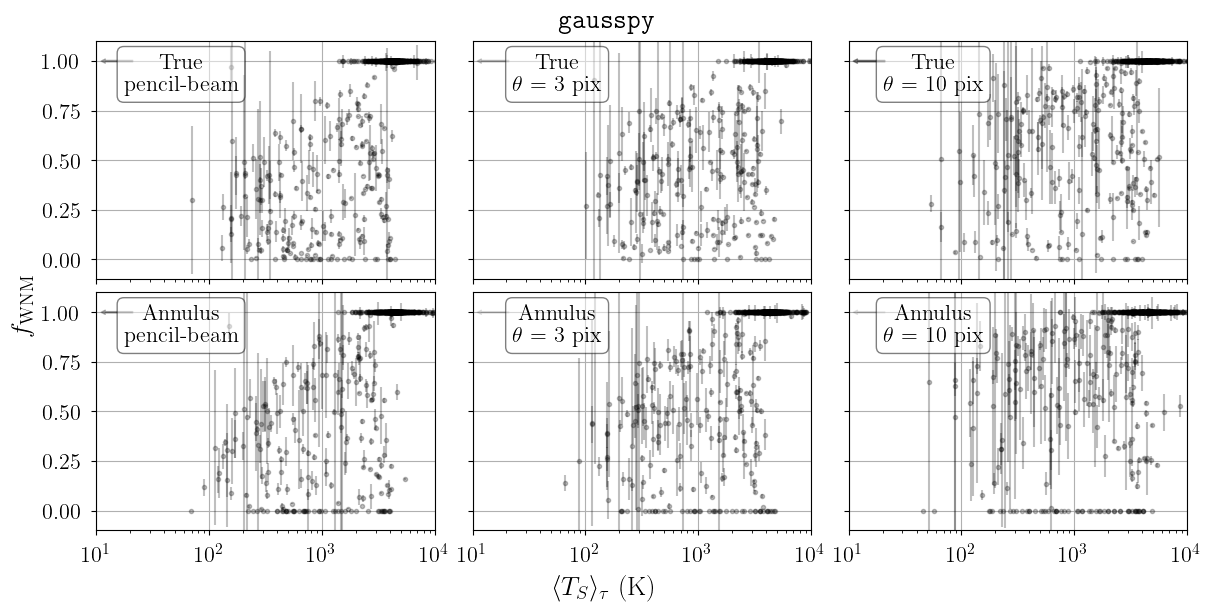

In [70]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [gausspy_results, gausspy_results],
    ["gausspy", "gausspy"],
    params = ["tau_weighted_tspin", "WNM_fraction"],
    num_bins=0,
    title=r"\texttt{gausspy}",
    xlabel=r"$\langle T_{S}\rangle_\tau$ (K)",
    ylabel=r"$f_{\rm WNM}$",
    xlim=(10.0, 10000.0),
    ylim=(-0.1, 1.1),
    xscale="log",
    equal_line=False,
    label_loc="upper left",
    drop_sightlines=bad_gausspy_sightlines,
)

## Comparisons with `TIGRESS-NCR`

analysis_plots version 0.1


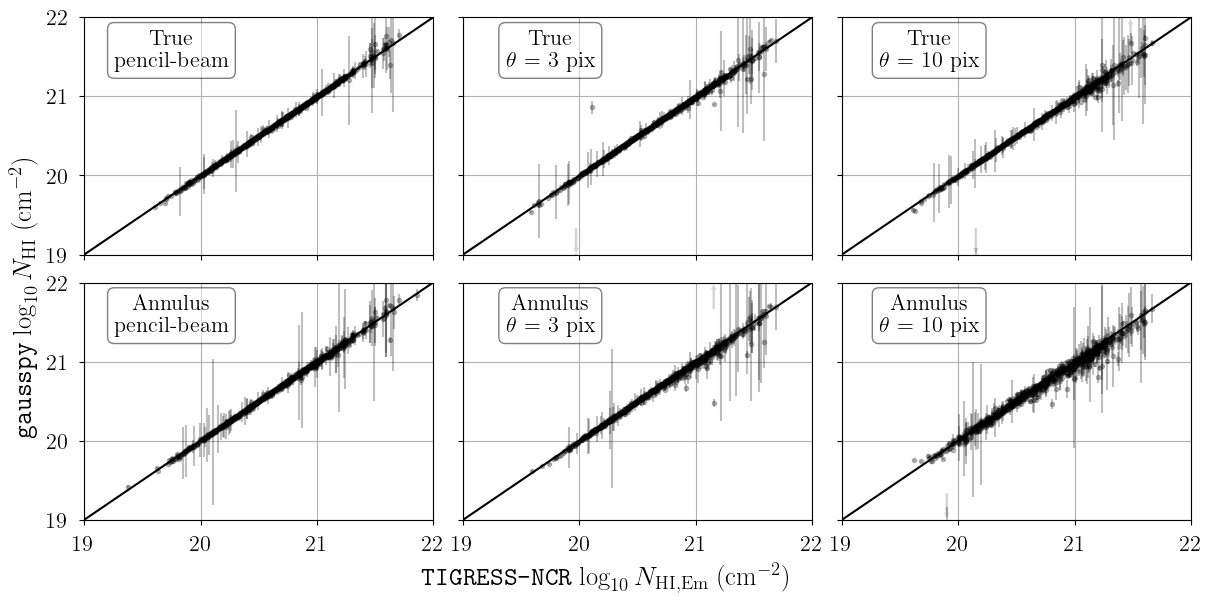

In [71]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [tigress_results, gausspy_results],
    ["tigress", "gausspy"],
    params = ["All_log10_NHI_TB", "All_log10_NHI"],
    num_bins=0,
    xlabel=r"{\tt TIGRESS-NCR} $\log_{10} N_{\rm HI, Em}$ (cm$^{-2}$)",
    ylabel=r"{\tt gausspy} $\log_{10} N_{\rm HI}$ (cm$^{-2}$)",
    xlim=(19.0, 22.0),
    ylim=(19.0, 22.0),
    equal_line=True,
    label_loc="upper left",
    drop_sightlines=bad_gausspy_sightlines,
)

analysis_plots version 0.1


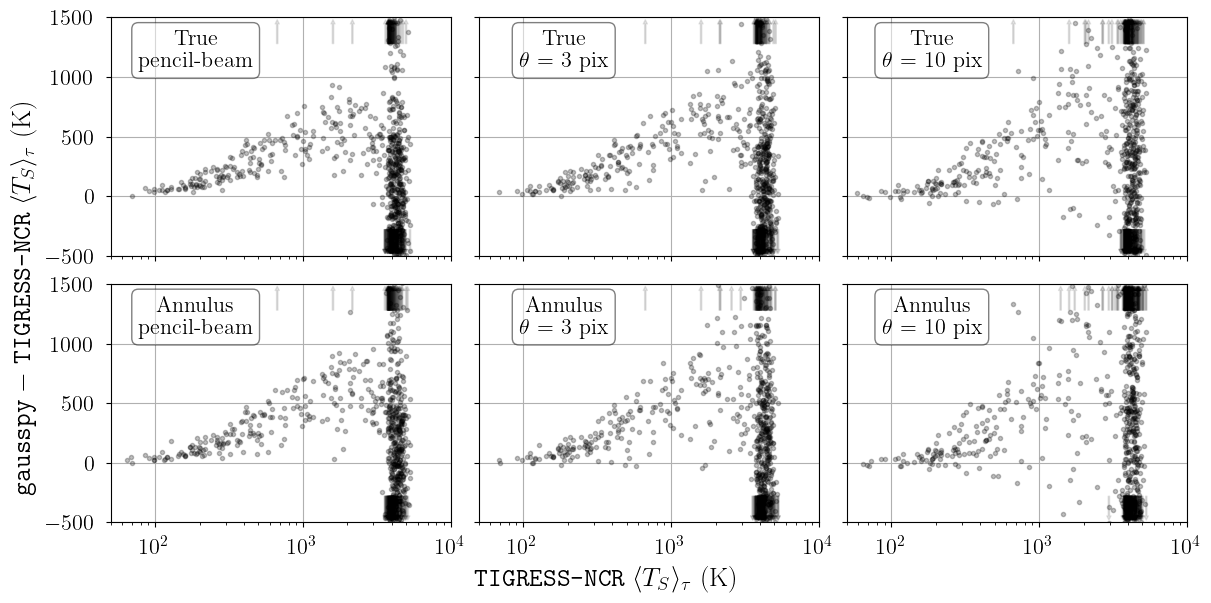

In [72]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [tigress_results, gausspy_results],
    ["tigress", "gausspy"],
    params = ["tau_weighted_tspin", "tau_weighted_tspin"],
    num_bins=0,
    xlabel=r"{\tt TIGRESS-NCR} $\langle T_{S}\rangle_\tau$ (K)",
    ylabel=r"{\tt gausspy} $-$ {\tt TIGRESS-NCR} $\langle T_{S}\rangle_\tau$ (K)",
    xlim=(50.0, 10000.0),
    ylim=(-500.0, 1500.0),
    xscale="log",
    #yscale="log",
    relative="absolute",
    equal_line=False,
    label_loc="upper left",
    drop_sightlines=bad_gausspy_sightlines,
)

analysis_plots version 0.1


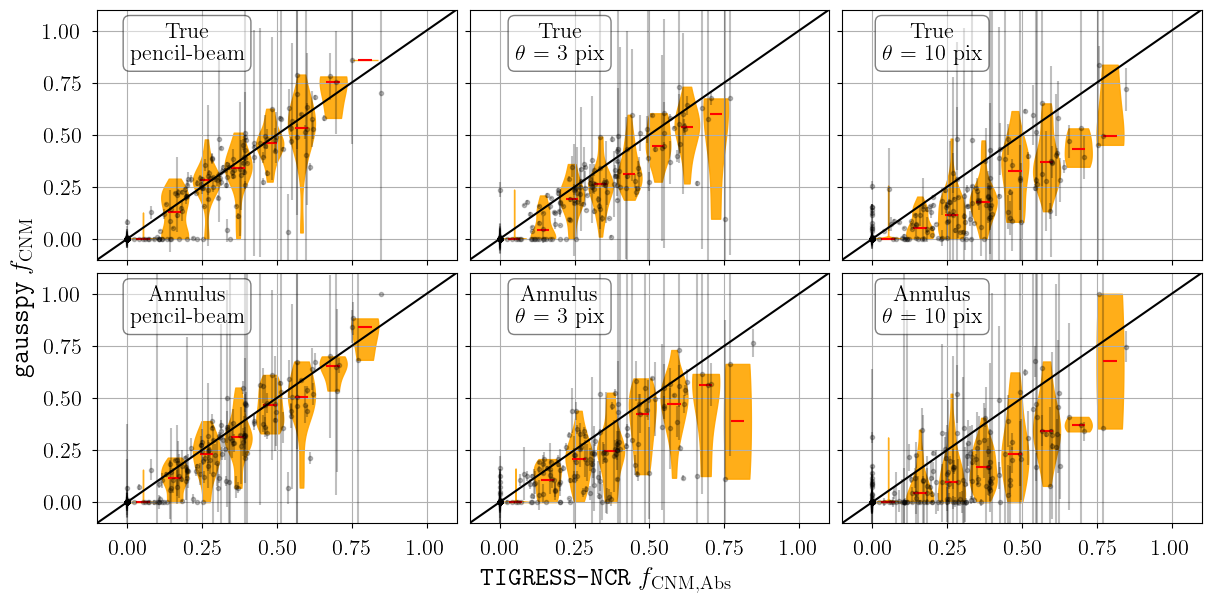

In [73]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [tigress_results, gausspy_results],
    ["tigress", "gausspy"],
    params = ["CNM_fraction_tau", "CNM_fraction"],
    num_bins=8,
    xlabel=r"{\tt TIGRESS-NCR} $f_{\rm CNM, Abs}$",
    ylabel=r"{\tt gausspy} $f_{\rm CNM}$",
    xlim=(-0.1, 1.1),
    ylim=(-0.1, 1.1),
    equal_line=True,
    label_loc="upper left",
    drop_sightlines=bad_gausspy_sightlines,
)

analysis_plots version 0.1


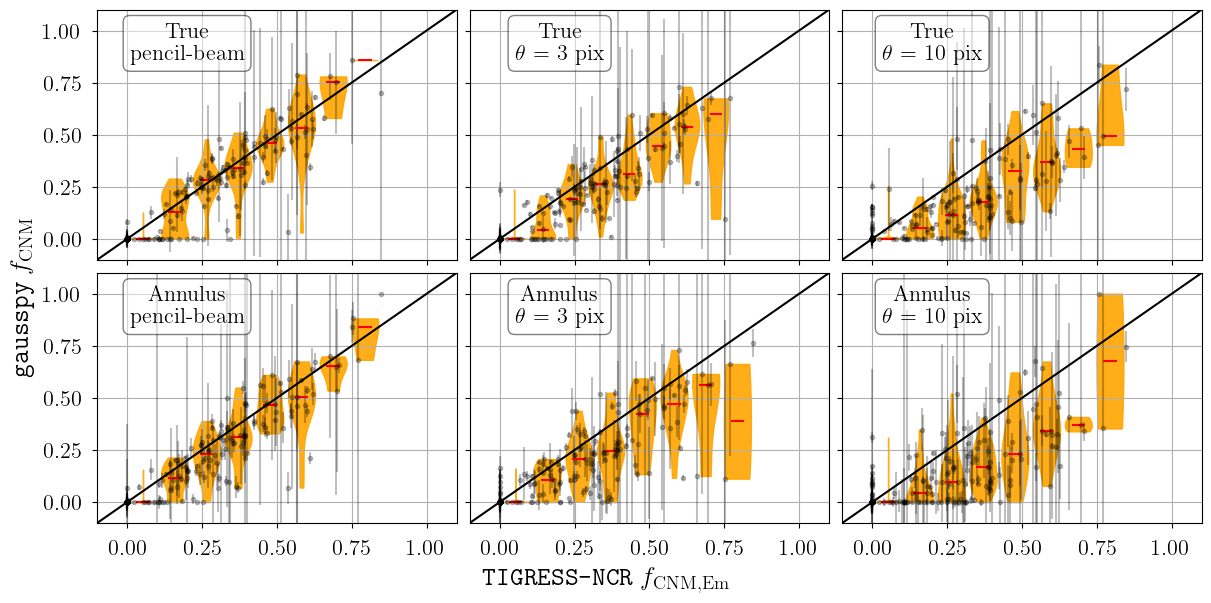

In [74]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [tigress_results, gausspy_results],
    ["tigress", "gausspy"],
    params = ["CNM_fraction_tau", "CNM_fraction"],
    num_bins=8,
    xlabel=r"{\tt TIGRESS-NCR} $f_{\rm CNM, Em}$",
    ylabel=r"{\tt gausspy} $f_{\rm CNM}$",
    xlim=(-0.1, 1.1),
    ylim=(-0.1, 1.1),
    equal_line=True,
    label_loc="upper left",
    drop_sightlines=bad_gausspy_sightlines,
)

analysis_plots version 0.1


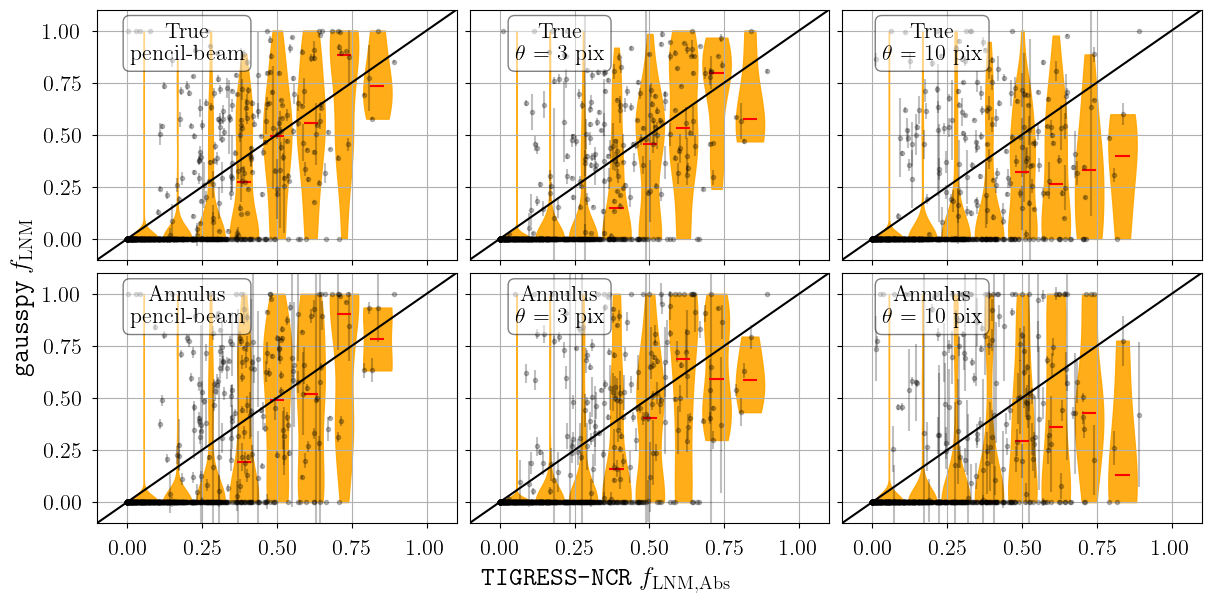

In [75]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [tigress_results, gausspy_results],
    ["tigress", "gausspy"],
    params = ["LNM_fraction_tau", "LNM_fraction"],
    num_bins=8,
    xlabel=r"{\tt TIGRESS-NCR} $f_{\rm LNM, Abs}$",
    ylabel=r"{\tt gausspy} $f_{\rm LNM}$",
    xlim=(-0.1, 1.1),
    ylim=(-0.1, 1.1),
    equal_line=True,
    label_loc="upper left",
    drop_sightlines=bad_gausspy_sightlines,
)

analysis_plots version 0.1


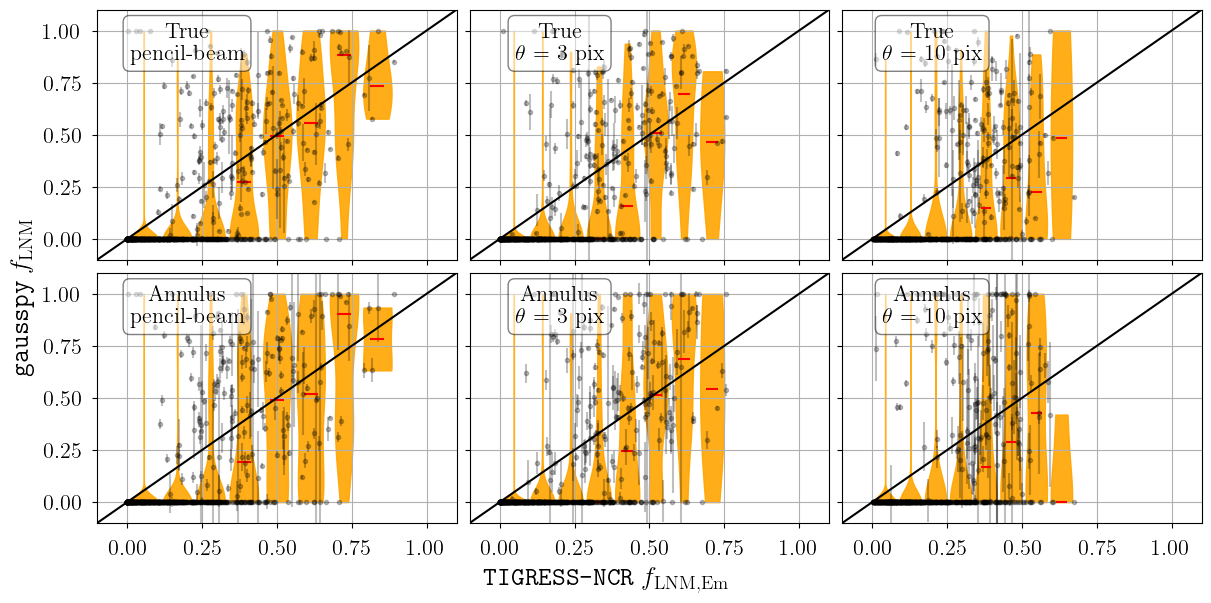

In [76]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [tigress_results, gausspy_results],
    ["tigress", "gausspy"],
    params = ["LNM_fraction_TB", "LNM_fraction"],
    num_bins=8,
    xlabel=r"{\tt TIGRESS-NCR} $f_{\rm LNM, Em}$",
    ylabel=r"{\tt gausspy} $f_{\rm LNM}$",
    xlim=(-0.1, 1.1),
    ylim=(-0.1, 1.1),
    equal_line=True,
    label_loc="upper left",
    drop_sightlines=bad_gausspy_sightlines,
)

analysis_plots version 0.1


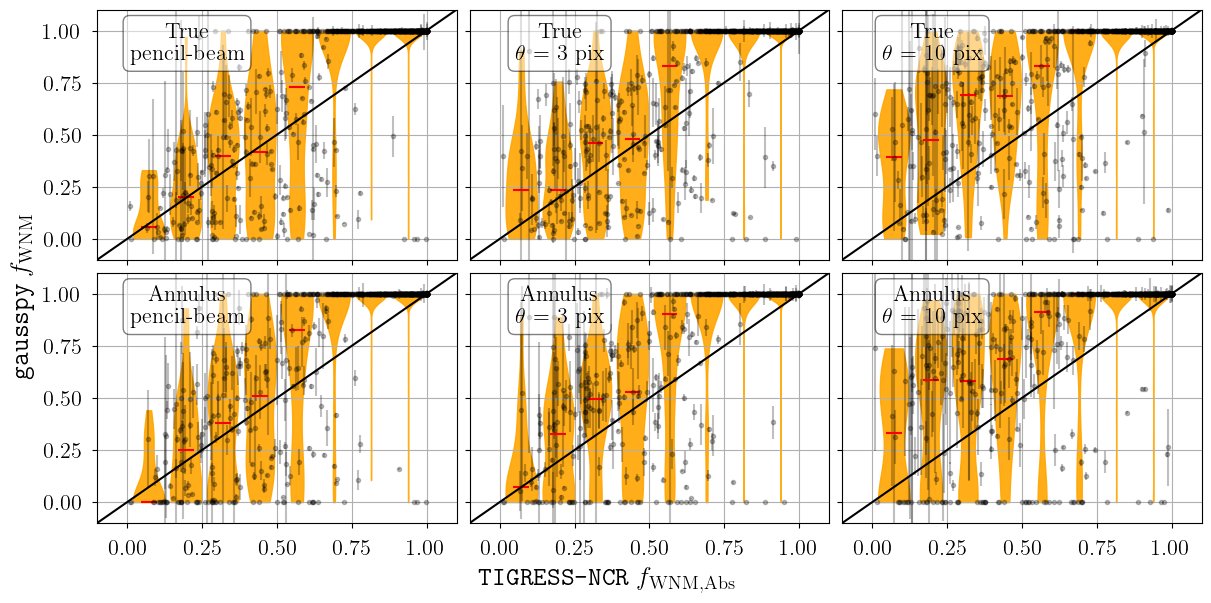

In [77]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [tigress_results, gausspy_results],
    ["tigress", "gausspy"],
    params = ["WNM_fraction_tau", "WNM_fraction"],
    num_bins=8,
    xlabel=r"{\tt TIGRESS-NCR} $f_{\rm WNM, Abs}$",
    ylabel=r"{\tt gausspy} $f_{\rm WNM}$",
    xlim=(-0.1, 1.1),
    ylim=(-0.1, 1.1),
    equal_line=True,
    label_loc="upper left",
    drop_sightlines=bad_gausspy_sightlines,
)

analysis_plots version 0.1


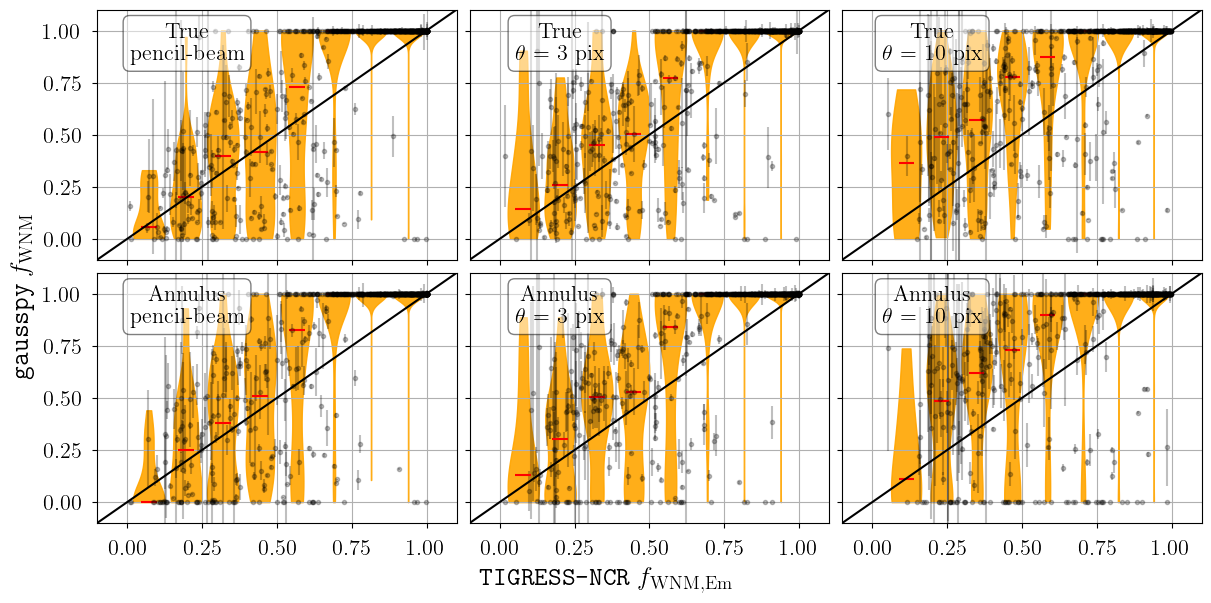

In [78]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Scatter,
    "parameter",
    [tigress_results, gausspy_results],
    ["tigress", "gausspy"],
    params = ["WNM_fraction_TB", "WNM_fraction"],
    num_bins=8,
    xlabel=r"{\tt TIGRESS-NCR} $f_{\rm WNM, Em}$",
    ylabel=r"{\tt gausspy} $f_{\rm WNM}$",
    xlim=(-0.1, 1.1),
    ylim=(-0.1, 1.1),
    equal_line=True,
    label_loc="upper left",
    drop_sightlines=bad_gausspy_sightlines,
)

analysis_plots version 0.1


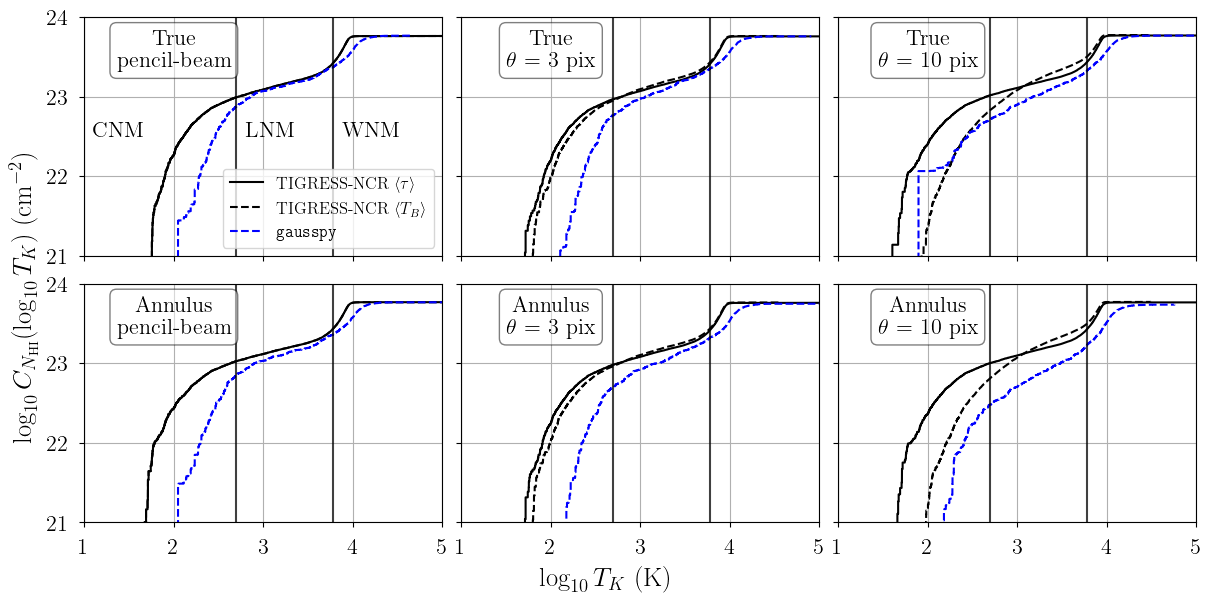

In [79]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Cumulative,
    "parameter",
    [tigress_results, tigress_results, gausspy_results],
    ["tigress", "tigress", "gausspy"],
    params = ["log10_tkin_tau", "log10_tkin_TB", "log10_tkin"],
    labels=[r"TIGRESS-NCR $\langle \tau\rangle$", r"TIGRESS-NCR $\langle T_B\rangle$",
            r"\texttt{gausspy}"],
    xlabel=r"$\log_{10} T_K$ (K)",
    ylabel=r"$\log_{10} C_{N_{\rm HI}}(\log_{10} T_K)$ (cm$^{-2}$)",
    xlim=(1.0, 5.0),
    ylim=(21.0, 24.0),
    equal_line=False,
    label_loc="upper left",
    num_samples=0,
    drop_sightlines = bad_gausspy_sightlines,
    vlines=[1.0, np.log10(500.0), np.log10(6000.0)],
    vline_labels=["CNM", "LNM", "WNM"],
    vline_label_offset = 0.1,
)

analysis_plots version 0.1


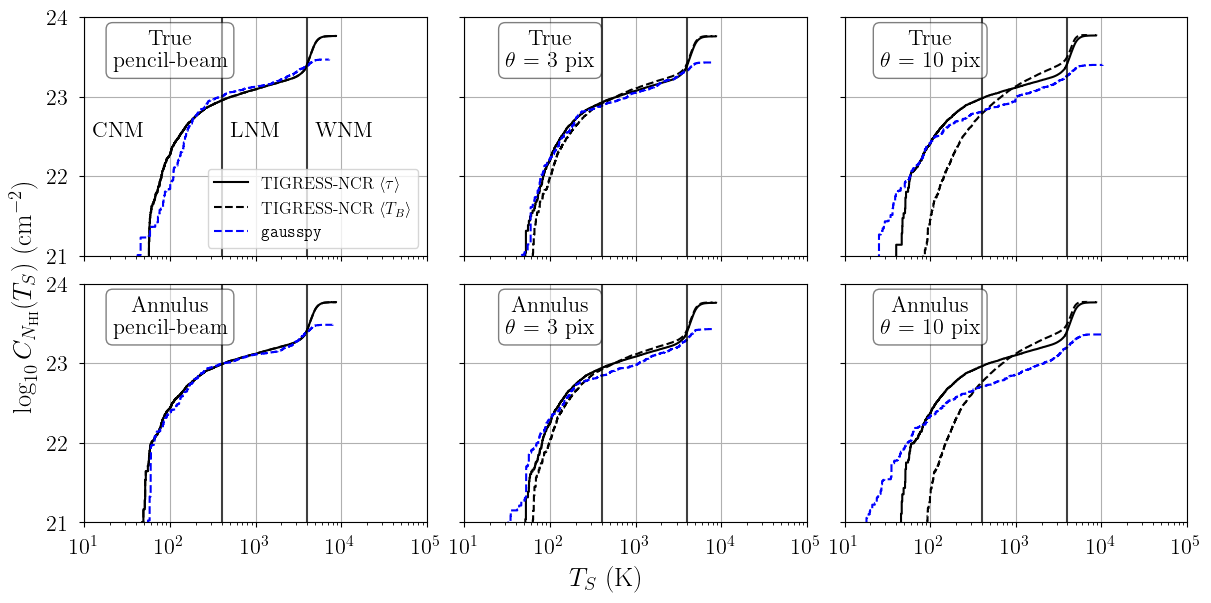

In [80]:
from scripts import analysis_plots
import importlib
importlib.reload(analysis_plots)

fig = analysis_plots.plot_grid(
    analysis_plots.Cumulative,
    "parameter",
    [tigress_results, tigress_results, gausspy_results],
    ["tigress", "tigress", "gausspy"],
    params = ["tspin_tau", "tspin_TB", "tspin"],
    labels=[r"TIGRESS-NCR $\langle \tau\rangle$", r"TIGRESS-NCR $\langle T_B\rangle$",
            r"\texttt{gausspy}"],
    xlabel=r"$T_S$ (K)",
    ylabel=r"$\log_{10} C_{N_{\rm HI}}(T_S)$ (cm$^{-2}$)",
    xlim=(10.0, 100000.0),
    ylim=(21.0, 24.0),
    xscale="log",
    equal_line=False,
    label_loc="upper left",
    num_samples=0,
    drop_sightlines = bad_gausspy_sightlines,
    vlines=[10.0, 400.0, 4000.0],
    vline_labels=["CNM", "LNM", "WNM"],
    vline_label_offset = 1.25,
)